## Import libraries

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import re

# Unused so far
import pickle
from pathlib import Path
from skimage import io

# import Image from PIL
from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2gray

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# import train_test_split from sklearn's model selection module
from sklearn.model_selection import train_test_split

# import SVC from sklearn's svm module
from sklearn.svm import SVC

# import accuracy_score from sklearn's metrics module
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix

# Deep learning libraries
import tensorflow as tf
# import keras library
import keras

# import Sequential from the keras models module
from keras.models import Sequential

# import Dense, Dropout, Flatten, Conv2D, MaxPooling2D from the keras layers module
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D




## Navigate to Project Folder

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')
%cd ..
%ls

G:\Shared drives\ML PROJECT
 Volume in drive G is Google Drive
 Volume Serial Number is 1983-1116

 Directory of G:\Shared drives\ML PROJECT

2022-04-26  03:26 PM    <DIR>          .
2022-04-25  08:39 AM    <DIR>          ..
2022-03-09  01:02 PM    <DIR>          .ipynb_checkpoints
2022-04-17  11:45 AM    <DIR>          Augmented_data
2022-03-09  12:44 PM    <DIR>          dataset_image_processing
2022-03-01  11:39 AM         1,851,251 datasets (1).zip
2022-03-15  08:07 AM         1,195,029 FinalProject_ML.ipynb
2022-04-26  03:33 PM    <DIR>          FP_Nehal_Anthony_Alex
2022-04-15  05:59 PM    <DIR>          logs
2022-03-01  01:29 PM         1,118,199 ML_Project_Proposal.pdf
2022-03-09  01:47 PM    <DIR>          Models
2022-04-15  07:20 PM    <DIR>          models (1)
2022-04-23  05:36 PM         1,194,608 Nehal_ML.ipynb
2022-03-15  12:02 PM           916,883 Netflix Recommender System.pdf
2022-04-26  03:16 PM    <DIR>          Notebooks
2022-03-09  01:04 PM    <DIR>          Origin

In [6]:
# Function for natural sort to make things chronological
# https://stackoverflow.com/questions/4836710/is-there-a-built-in-function-for-string-natural-sort
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

## The original image files we use (1654 images)
img_files = natural_sort(os.listdir('Original_data/dataset_alternate/dataset_1/'))
print('# of original images: ', len(img_files))
labels_ = pd.read_csv('Original_data/dataset_alternate/labels_1.csv').sort_values(by='id')
labels_ = labels_.astype(int)
labels = labels_['genus'].values
# Show the output of the natural sort so the plots will be chronological
## Augmented images
# bw_images = natural_sort(os.listdir('Augmented_data/bw/'))
# rcz_images = natural_sort(os.listdir('Augmented_data/rcz/'))
# rcz_color = natural_sort(os.listdir('Augmented_data/rcz_color/'))

## The high resolution images
# hr_images = natural_sort(os.listdir('Original_Large-Data/images/'))
# labels_high = pd.read_csv('Original_Large-Data/images_labels.csv').sort_values(by='id')
# labels_high_ = labels_high['genus'].values.astype(int)
# print(labels_high[0:10])
# print(hr_images[0:10])
# print(labels_high_[0:10])
# print(len(labels_high_))
# print(len(hr_images))

# of original images:  1654


## Making the Pipeline to create black and white images

In [4]:
# image_paths = ['Original_data/dataset_alternate/dataset_1/' + im for im in img_files2]

def image_processing(path):
    img = Image.open(path)

    # create the paths to save files to
    bw_path = "Augmented_data/bw/bw_{}.jpg".format(path.stem)
    rcz_path = "Augmented_data/rcz_color/rcz_{}.jpg".format(path.stem)

    # print("Creating grayscale version of {} and saving to {}.".format(path, bw_path))
    # bw = img.convert("L").resize((100, 100))
    # bw.save(bw_path)
    
    # print("Creating rotated, cropped, and zoomed version of {} and saving to {}.".format(path, rcz_path))
    rcz = img.rotate(180).crop([10, 10, 40, 40]).resize((50, 50))
    rcz.save(rcz_path)

# # # for loop over the image paths
# for img_path in image_paths:
#     image_processing(Path(img_path))

## Deep Learning Approach to Solving this Problem

### Import Bee Images, Train, test, split

In [10]:
# 4. Importing the image data
# create empty list
image_list_bw = []
image_list_rcz = []
image_list_hr = []
image_list = []
bw = False
rcz = False
color_rcz = False
high_res = False
for i in range(labels.shape[0]):
# for i in range(labels_high_.shape[0]):
    # load images
    if bw == False and rcz == False:
        img = io.imread('Original_data/dataset_alternate/dataset_1/'+img_files[i].format(i)).astype(np.uint8)  
    if bw == True:
        img_bw = io.imread('Augmented_data/bw/'+bw_images[i].format(i)).astype(np.uint8)  
    if rcz == True and bw == True:
        print('Augmented_data/rcz/'+rcz_images[i])
        img_rcz = io.imread('Augmented_data/rcz/'+rcz_images[i].format(i)).astype(np.uint8)
    if color_rcz==True:
        img_rcz = io.imread('Augmented_data/rcz_color/'+rcz_color[i].format(i)).astype(np.uint8)
        img = io.imread('Original_data/dataset_alternate/dataset_1/'+img_files[i].format(i)).astype(np.uint8)
    if high_res == True:
        img_hi = io.imread('Original_Large-Data/images/'+hr_images[i].format(i))
    # append to list of all images
    if bw == False and rcz == False:
        image_list.append(img)
    if rcz == True and bw == True:
        image_list_rcz.append(img_rcz)
        image_list_bw.append(img_bw)
    if color_rcz == True:
        image_list_rcz.append(img_rcz)
        image_list.append(img)
    if high_res == True:
        image_list_hr.append(img_hi)

    



# convert image list to single array
if bw == False and rcz == False:
    X = np.array(image_list)
    # X = X_/255
    # assign the genus label values to y
    y = labels

# Only for augmentation
if bw == True and rcz == True:
    X = np.concatenate([image_list_bw, image_list_rcz])
    y = np.concatenate([labels,labels])
    # X = X/255
    X = np.expand_dims(X, axis=-1)

# Only for augmentation
if color_rcz == True:
    X = np.concatenate([image_list, image_list_rcz])
    y = np.concatenate([labels,labels])
    # X = X/255

if high_res == True:
    X = np.array(image_list_hr)
    y = labels_high_
    # y = np.delete(y, 1597)
    # X = X/255
print("Full X shape", X.shape)

# print value counts for genus
print(np.unique(y, return_counts=True))

# 5 SPLITTING
# split out evaluation sets (x_eval and y_eval)
x_interim, x_eval, y_interim, y_eval = train_test_split(X,y, 
                                                        test_size=0.2, 
                                                        random_state=52)

# split remaining data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_interim, 
                                                    y_interim, 
                                                    test_size=0.2, 
                                                    random_state=52)

# examine number of samples in train, test, and validation sets
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_eval.shape[0], 'eval samples')

Full X shape (1654, 50, 50, 3)
(array([0, 1]), array([827, 827], dtype=int64))
x_train shape: (1058, 50, 50, 3)
1058 train samples
265 test samples
331 eval samples


## Show some Bees

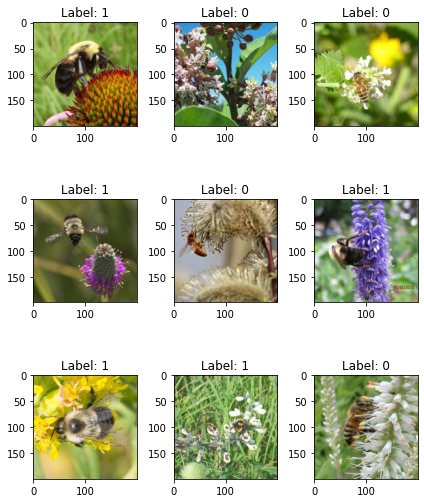

In [38]:
# Visualize

num = 9  # number of images to visualize
images_ = x_train[:num]
labels_ = y_train[:num]

num_row = 3
num_col = 3

fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2.5*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images_[i][:,:,:], cmap='gray')
    ax.set_title('Label: {}'.format(labels_[i]))
plt.tight_layout()
plt.show()

# Transfer learning

Although I was not able to find the architecture that yielded high accuracy, with the transfer learning approach...

In [39]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

ResNet50_model = ResNet50(weights='imagenet')

In [11]:
# ResNet50_model.summary()

In [40]:
'''
Feature Extraction is performed by ResNet50 pretrained on imagenet weights. 
Input size is 224 x 224.
'''
def feature_extractor(inputs):
#   input_tensor = Input(shape=(IMG_SIZE,IMG_SIZE,1) )
#   input1 = Conv2D(3,(1,1),padding='same')(inputs)

    input2 = preprocess_input(inputs)
  
    feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(200, 200, 3),
                                               include_top=False,
                                               weights='imagenet')(input2)
    return feature_extractor


'''
Defines final dense layers and subsequent softmax layer for classification.
'''
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    # x = tf.keras.layers.Dense(128, activation="relu")(x)
    # x = tf.keras.layers.Dense(64, activation="relu")(x)
    # x = tf.keras.layers.Dropout(0.25)(x)
    x = tf.keras.layers.Dense(1, activation = 'sigmoid', name="classification")(x)
    return x

'''
Since input image size is (50 x 50), first upsample the image by factor of (5x5) to transform it to (250 x 250)
Connect the feature extraction and "classifier" layers to build the model.
'''
def final_model(inputs):

    resize = tf.keras.layers.UpSampling2D(size=(1,1))(inputs)
    # resize1 = Conv2D(3,(1,1),padding='same')(resize)

    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)

    return classification_output

'''
Define the model and compile it. 
Use Stochastic Gradient Descent as the optimizer.
Use Sparse Categorical CrossEntropy as the loss function.
'''
def define_compile_model():

    inputs = tf.keras.layers.Input(shape=(200,200,3))

    classification_output = final_model(inputs) 
    model = tf.keras.Model(inputs=inputs, outputs = classification_output)
    opt = tf.keras.optimizers.Adamax(learning_rate=0.001)
    model.compile(optimizer=opt, 
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics = [tf.keras.metrics.BinaryAccuracy()])
  
    return model


model = define_compile_model()

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 200, 200, 3)      0         
 )                                                               
                                                                 
 tf.__operators__.getitem (S  (None, 200, 200, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 200, 200, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0     

In [41]:
EPOCHS = 30
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data = (x_test, y_test), batch_size=64)

Epoch 1/30
40/40 [==============================] - 22s 356ms/step - loss: 0.2832 - binary_accuracy: 0.8905 - val_loss: 569.1245 - val_binary_accuracy: 0.8000
Epoch 2/30
40/40 [==============================] - 12s 308ms/step - loss: 0.0910 - binary_accuracy: 0.9649 - val_loss: 3.5437 - val_binary_accuracy: 0.8126
Epoch 3/30
40/40 [==============================] - 12s 308ms/step - loss: 0.0509 - binary_accuracy: 0.9835 - val_loss: 1.0049 - val_binary_accuracy: 0.8866
Epoch 4/30
40/40 [==============================] - 12s 308ms/step - loss: 0.0133 - binary_accuracy: 0.9957 - val_loss: 0.5238 - val_binary_accuracy: 0.8913
Epoch 5/30
40/40 [==============================] - 12s 308ms/step - loss: 0.0075 - binary_accuracy: 0.9972 - val_loss: 0.2290 - val_binary_accuracy: 0.9244
Epoch 6/30
40/40 [==============================] - 12s 308ms/step - loss: 0.0061 - binary_accuracy: 0.9980 - val_loss: 0.2944 - val_binary_accuracy: 0.9228
Epoch 7/30
40/40 [==============================] - 12s 

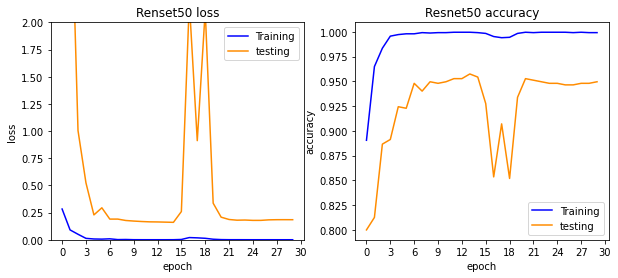

In [44]:
train_loss = history.history['loss']
train_acc = history.history['binary_accuracy']
test_loss = history.history['val_loss']
test_acc = history.history['val_binary_accuracy']

fig, ax = plt.subplots(1,2, figsize = (10,4))
ax[0].plot(train_loss, label = "Training", color='blue')
ax[1].plot(train_acc, label = "Training", color='blue')
ax[0].plot(test_loss, label = "testing", color='darkorange')
ax[1].plot(test_acc, label = "testing", c='darkorange')
ax[1].set_xticks(np.arange(0,31,3))
ax[0].set_xticks(np.arange(0,31,3))
# ax[0].set_xlim(0,35)
# ax[1].set_xlim(0,35)
ax[0].set_ylim(0,2)
ax[0].set_xlabel('epoch')
ax[1].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[1].set_ylabel('accuracy')
ax[0].set_title('Renset50 loss')
ax[1].set_title('Resnet50 accuracy')
# plt.suptitle('Resnet50 pretrained model with additional trained layers to classify the bee images')
ax[0].legend()
ax[1].legend();

In [43]:
# evaluate model on test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("")

# evaluate model on holdout set
eval_score = model.evaluate(x_eval, y_eval, verbose=0)
# print loss score
print('Eval loss:', eval_score[0])
# print accuracy score
print('Eval accuracy:', eval_score[1])

Test loss: 0.18482273817062378
Test accuracy: 0.9496062994003296

Eval loss: 0.25692009925842285
Eval accuracy: 0.9458438158035278
